<a href="https://colab.research.google.com/github/radara09/Tugas-Image-Classification/blob/main/Tugas_11_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [7]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [8]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [9]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [10]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [11]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [12]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [13]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(147, 64, 64, 3)


In [15]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(64, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(200, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               2509000   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [16]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [17]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 4s 281ms/step - loss: 1.6739 - accuracy: 0.3105 - val_loss: 1.5004 - val_accuracy: 0.3673
Epoch 2/25
14/14 [==============================] - 4s 271ms/step - loss: 1.3188 - accuracy: 0.4612 - val_loss: 1.2062 - val_accuracy: 0.4218
Epoch 3/25
14/14 [==============================] - 4s 271ms/step - loss: 1.0370 - accuracy: 0.5616 - val_loss: 0.9487 - val_accuracy: 0.6531
Epoch 4/25
14/14 [==============================] - 4s 272ms/step - loss: 0.8044 - accuracy: 0.7078 - val_loss: 0.7804 - val_accuracy: 0.7619
Epoch 5/25
14/14 [==============================] - 4s 272ms/step - loss: 0.6436 - accuracy: 0.7671 - val_loss: 0.7969 - val_accuracy: 0.7211
Epoch 6/25
14/14 [==============================] - 4s 271ms/step - loss: 0.6147 - accuracy: 0.7740 - val_loss: 0.7232 - val_accuracy: 0.7415
Epoch 7/25
14/14 [==============================] - 4s 271ms/step - loss: 0.5466 - accuracy: 0.8014 - val_loss: 0.6723 - val_accuracy: 0.7483
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


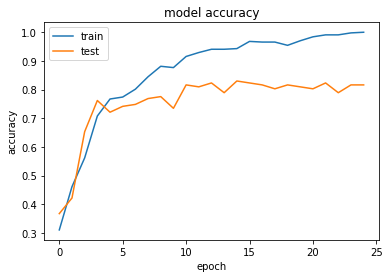

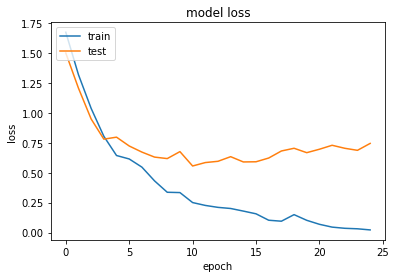

In [18]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.89      0.86      0.87        36
      GMB_03       0.89      0.83      0.86        30
      GMB_05       0.61      0.95      0.74        21
      GMB_07       0.86      0.60      0.71        30
      GMB_09       0.87      0.87      0.87        30

    accuracy                           0.82       147
   macro avg       0.82      0.82      0.81       147
weighted avg       0.84      0.82      0.82       147



In [20]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [21]:
import cv2
import matplotlib.pyplot as plt
image1='Daun Hijau.jpg'

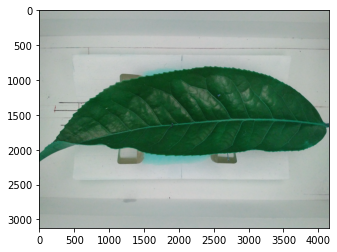

In [22]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [23]:
image_testing = Image.open('Daun Hijau.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [24]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [25]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.2375454e-05 9.9997354e-01 2.5755670e-08 1.4614943e-08 4.0793134e-06]]
['GMB_03']
